# Kernel SVM Notebook

#### *Author: Kunyu He*
#### *University of Chicago, CAPP'20*

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
mpl.style.use("seaborn")

In [3]:
def actual_vs_predicted(ax, classifier, X, y, 
                        title=None, xlabel=None, ylabel=None,
                        postive_color="red", negative_color="green", edge_color="black",
                        postive_legend=None, negative_legend=None, legend_loc="best"):
    X1, X2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]
                                                    ).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap((negative_color,
                                                      postive_color)))
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c=negative_color,
               label=negative_legend, edgecolors=edge_color, alpha=0.8)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c=postive_color,
               label=postive_legend, edgecolors=edge_color, alpha=0.8)
    
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': "bold"})
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.legend(frameon=True, framealpha=0.3, fancybox=True, fontsize=12)

### Load Data

In [4]:
network = pd.read_csv("Social_Network_Ads.csv")
network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Cleaning

In [5]:
network.shape

(400, 5)

In [6]:
network.isnull().sum(axis=0)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No missing data.

### Feature Selection

In [7]:
X = network.iloc[:, 2:4].values.astype(float)
X.shape

(400, 2)

In [8]:
y = network.Purchased.values.astype(float)
y.shape

(400,)

### Training and Test Set Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=123)

### Feature Scaling

In [10]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Model Training & Evaluation

#### Linear Kernel

In [25]:
svmc_linear = SVC(kernel="linear", random_state=123)
svmc_linear.fit(X_train, y_train)
linear_pred = svmc_linear.predict(X_test)

In [26]:
confusion_matrix(y_test, linear_pred)

array([[59,  4],
       [14, 23]], dtype=int64)

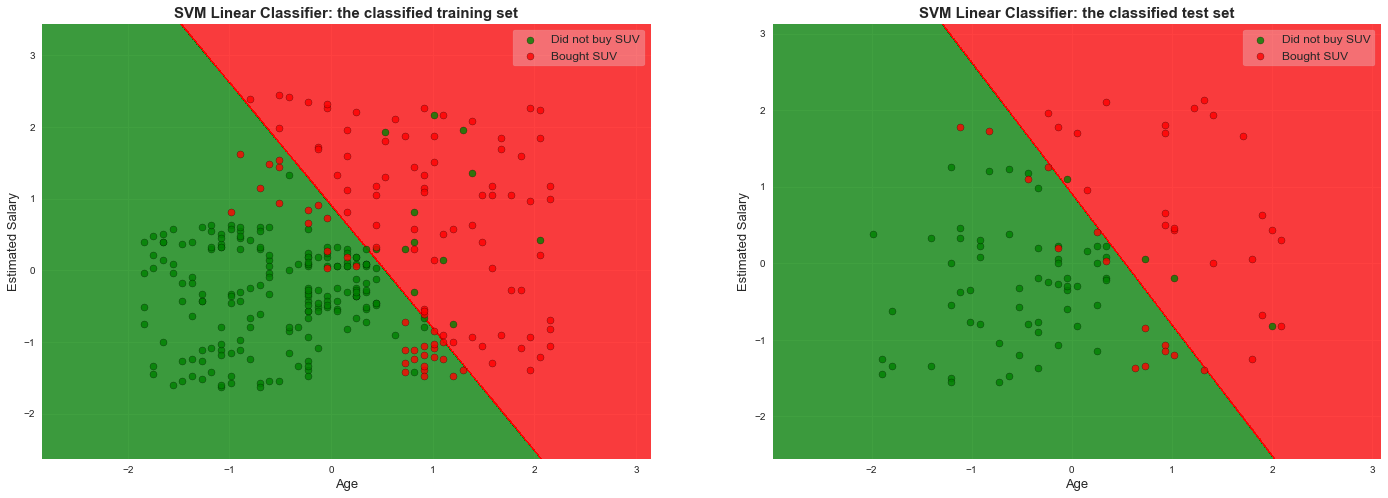

In [30]:
fig = plt.figure(figsize=[24, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

actual_vs_predicted(ax1, svmc_linear, X_train, y_train,
                    title="SVM Linear Classifier: the classified training set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

actual_vs_predicted(ax2, svmc_linear, X_test, y_test,
                    title="SVM Linear Classifier: the classified test set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

plt.show()

#### Gaussian (RBF) Kernel

In [28]:
svmc_rbf = SVC(kernel="rbf", random_state=123)
svmc_rbf.fit(X_train, y_train)
rbf_pred = svmc_rbf.predict(X_test)

In [29]:
confusion_matrix(y_test, rbf_pred)

array([[55,  8],
       [ 3, 34]], dtype=int64)

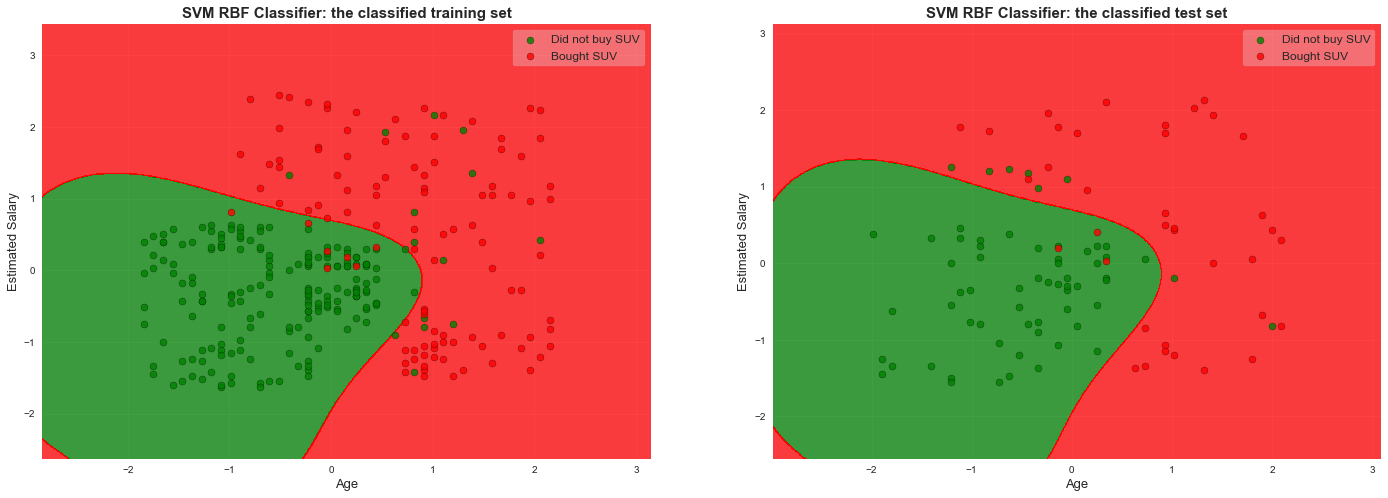

In [31]:
fig = plt.figure(figsize=[24, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

actual_vs_predicted(ax1, svmc_rbf, X_train, y_train,
                    title="SVM RBF Classifier: the classified training set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

actual_vs_predicted(ax2, svmc_rbf, X_test, y_test,
                    title="SVM RBF Classifier: the classified test set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

plt.show()

#### Polynomial Kernel

In [54]:
svmc_poly = SVC(kernel="poly", degree=3, random_state=123)
svmc_poly.fit(X_train, y_train)
poly_pred = svmc_poly.predict(X_test)

In [55]:
confusion_matrix(y_test, poly_pred)

array([[61,  2],
       [15, 22]], dtype=int64)

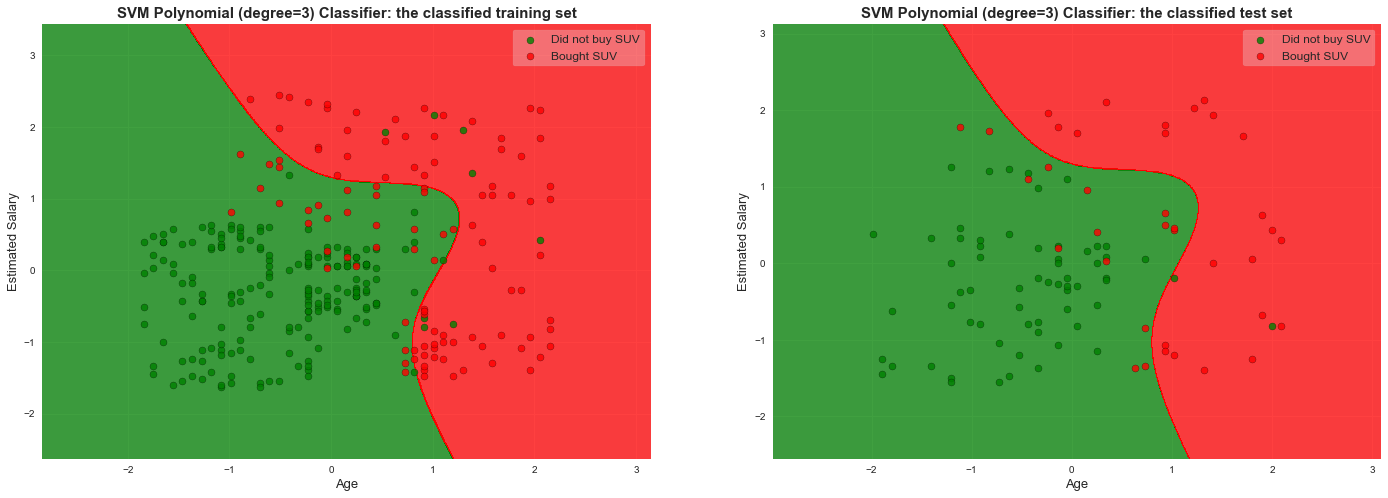

In [60]:
fig = plt.figure(figsize=[24, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

actual_vs_predicted(ax1, svmc_poly, X_train, y_train,
                    title="SVM Polynomial (degree=3) Classifier: the classified training set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

actual_vs_predicted(ax2, svmc_poly, X_test, y_test,
                    title="SVM Polynomial (degree=3) Classifier: the classified test set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

plt.show()

#### Sigmoid Kernel

In [61]:
svmc_sig = SVC(kernel="sigmoid", random_state=123)
svmc_sig.fit(X_train, y_train)
sig_pred = svmc_sig.predict(X_test)

In [62]:
confusion_matrix(y_test, sig_pred)

array([[53, 10],
       [17, 20]], dtype=int64)

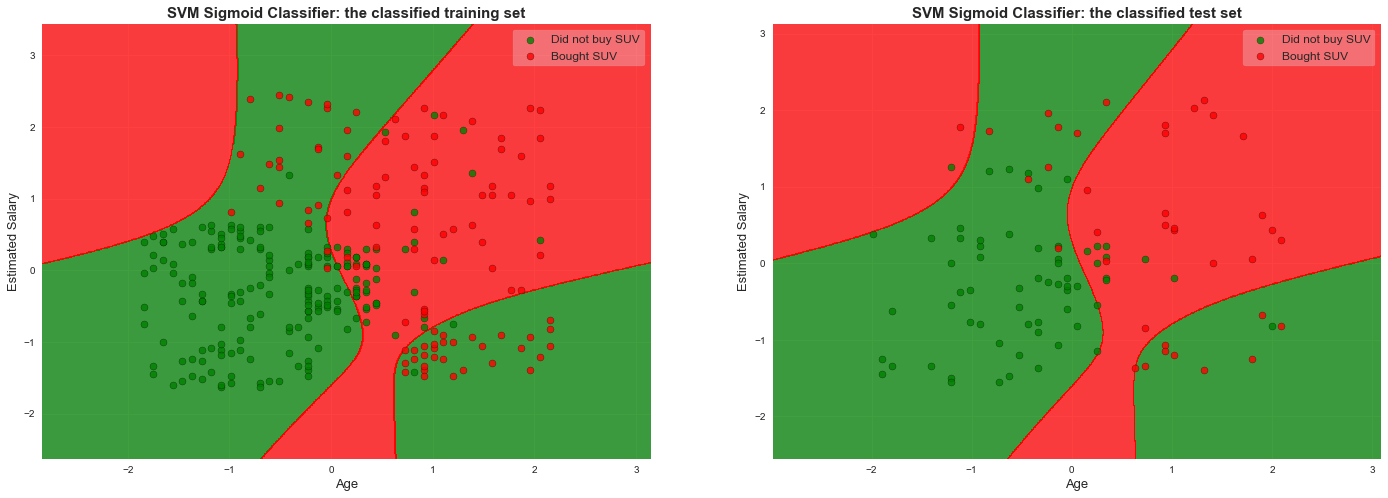

In [63]:
fig = plt.figure(figsize=[24, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

actual_vs_predicted(ax1, svmc_sig, X_train, y_train,
                    title="SVM Sigmoid Classifier: the classified training set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

actual_vs_predicted(ax2, svmc_sig, X_test, y_test,
                    title="SVM Sigmoid Classifier: the classified test set",
                    xlabel="Age", ylabel="Estimated Salary",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

plt.show()